# Capstone Project - Neighborhood Clustering and Analysis (Based on Restaurants) - Mumbai,India.

### Applied Data Science Capstone

## Table of Content
* [Introduction](#intro)
* [Data](#data)
* [Methodology](#method) 
* [Clustering](#clustering)
* [Analysis](#analysis)
* [Final Output](#output)
* [Result](#result)
* [Conclusion](#conclusion)

## Introduction - Business Problem <a name='intro'></a>

This Capstone project is based on neighborhood clustering and location analysis in city of <b>Mumbai </b>,India.In this project , we will try to find optimal location for a <b>restaurant</b>.

First, i will be clustering different neighborhoods with the help of extracted data. Then, analysis of every neighborhood which will be shown on map giving you a idea that which <b>location is crowded with people</b>. 
This analysis is useful to new start ups who are looking for<b> a place to set up restaurant business.</b> 

Also , the analysis is also based on which type of or <b>which cuisine restaurents is most and least popular</b> in a particular area.
Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## Data <a name='data'></a>

Based on definition of our problem, factors that will influence our decission are:
<ul>
<li>Different neighborhoods location.</li>
<li>number of existing restaurants in the neighborhood .(any type of restaurant)</li>
<li>number of different venues that attracts crowd and have parking facilities. </li>
</ul>

<br>

Following sources will be required for the data: <ul>
<li>Coordinates of location will be generated algorithmically and approximate addresses of centers of those areas will be obtained using GeoPy geocoding.</li>
<li>number of restaurants and their type and location in every neighborhood will be obtained using Foursquare API.</li>
    </ul>

### Neighborhood and its Coordinates

Importing Pandas ,requests and json Libraries for data extraction. 

In [1]:
import pandas as pd
import requests ,json
from pandas.io.json import json_normalize

Lets extract name of neighborhood and its postal codes in the city from an URL with the help of pandas and requests and save it as .CSV file.  

In [2]:
url = 'https://www.mapsofindia.com/pincode/india/maharashtra/mumbai/'
html = requests.get(url).content
df = pd.read_html(html)
df2 = df[0]

In [3]:
df2.to_csv('mumbai.csv')
mum = pd.read_csv('mumbai.csv')
df_mum = pd.DataFrame(data=mum)
df_mum.head()

Unnamed: 0   Pincode Details Pincode Details.1 Pincode Details.2  \
0           0          Location           Pincode             State   
1           1  A I staff colony            400029       Maharashtra   
2           2  Aareymilk Colony            400065       Maharashtra   
3           3          Agripada            400011       Maharashtra   
4           4           Airport            400099       Maharashtra   

  Pincode Details.3  
0          District  
1            Mumbai  
2            Mumbai  
3            Mumbai  
4            Mumbai

In [4]:
df_mum.shape

(183, 5)

So , we got <b>183</b> neighborhoods and its postal codes. Now, we will do some proper indexing and cleaning.

In [5]:
df_mum.rename(columns={'Pincode Details':'Neighborhood','Pincode Details.1':'Pincode','Pincode Details.3':'District'},inplace=True)
df_mum.drop(columns={'Pincode Details.2','Unnamed: 0'},inplace=True)
df_mum.drop([0],inplace=True)

In [6]:
df_mum.reset_index(inplace=True)
df_mum.drop('index',axis=1,inplace=True)
df_mum.head()

Neighborhood Pincode District
0  A I staff colony  400029   Mumbai
1  Aareymilk Colony  400065   Mumbai
2          Agripada  400011   Mumbai
3           Airport  400099   Mumbai
4          Ambewadi  400004   Mumbai

We got a proper Dataframe and now only need is coordinates.For this, we will need to install GeoPy Library.<br>
Now we will import <b>Nominatim library</b> and use <b>Foursquare</b> agent for it and then appending this coordinates to above dataframe. 

In [7]:
#!pip install geopy
from geopy.geocoders import Nominatim

latitude=[]
longitude=[]
for code in df_mum['Pincode']:
    address = 'Mumbai,'+code
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude.append(location.latitude)
    longitude.append(location.longitude)
print('Done.')

Done.


In [8]:
df_mum['Latitude'] = [lat for lat in latitude]
df_mum['Longitude'] = [lng for lng in longitude]
df_mum = df_mum[df_mum['Longitude'].le(73)]
df_mum.head()

Neighborhood Pincode District   Latitude  Longitude
0  A I staff colony  400029   Mumbai  19.075990  72.877393
1  Aareymilk Colony  400065   Mumbai  19.075990  72.877393
2          Agripada  400011   Mumbai  19.075990  72.877393
3           Airport  400099   Mumbai  19.075990  72.877393
4          Ambewadi  400004   Mumbai  18.962367  72.827122

In [9]:
df_mum.shape

(175, 5)

As we can see by using geopy we got<b> 175 </b>coordinates but still some of major neighborhoods are missing.So, due to this unreliability of geopy, we need to manually add some of the major neighborhood and their information.

In [10]:
add_list = [pd.Series(['Matunga East','400000','Mumbai',19.023709,72.853979],index=df_mum.columns) ,
        pd.Series(['Wadala','400000','Mumbai',19.025981,72.877641],index=df_mum.columns) ,
        pd.Series(['Delisle Road','400000','Mumbai',18.989951,72.833403],index=df_mum.columns),
        pd.Series(['Worli','400000','Mumbai',19.009752,72.818656],index=df_mum.columns),
        pd.Series(['Elpinstone Road','400000','Mumbai',19.007155,72.844034],index=df_mum.columns),
        pd.Series(['Andheri East','400000','Mumbai',19.115778,72.859034],index=df_mum.columns),
        pd.Series(['Worli Koliwada','400000','Mumbai',19.020776,72.817600],index=df_mum.columns),   
        pd.Series(['Thane','400000','Mumbai',19.1943294,72.9701779],index=df_mum.columns) ,
        pd.Series(['Powai','400000','Mumbai',19.1187195,72.9073476],index=df_mum.columns),
        pd.Series(['Chembur','400000','Mumbai',19.0626319,72.9011399],index=df_mum.columns),       
        pd.Series(['Chembur East','400000','Mumbai',19.046065,72.8954733],index=df_mum.columns),
        pd.Series(['Ghatkopar','400000','Mumbai',19.0834898,72.9120255],index=df_mum.columns),
        pd.Series(['Sahar','400000','Mumbai',19.0995955,72.867284],index=df_mum.columns),
        pd.Series(['Andheri West','400000','Mumbai',19.1172495,72.833968],index=df_mum.columns),
        pd.Series(['Juhu','400000','Mumbai',19.1070215,72.8275275],index=df_mum.columns),
        pd.Series(['Kalina','400000','Mumbai',19.079273,72.8612672],index=df_mum.columns),
        pd.Series(['Bandra West','400000','Mumbai',19.0583358,72.8302669],index=df_mum.columns),
        pd.Series(['Nahur','400000','Mumbai',19.15687621,72.94938403],index=df_mum.columns),
        pd.Series(['Dahisar','400000','Mumbai',19.25414062,72.85652162],index=df_mum.columns),
        pd.Series(['Malwani','400000','Mumbai',19.18788736,72.81925201],index=df_mum.columns),   
        pd.Series(['Lokhandwala complex','400000','Mumbai',19.140382,72.827605],index=df_mum.columns),
        pd.Series(['Mankhurd','400000','Mumbai',19.049553,72.934083],index=df_mum.columns),
        pd.Series(['Aarey Milk colony','400000','Mumbai',19.151121,72.873161],index=df_mum.columns),
        pd.Series(['Goregaon West','400000','Mumbai',19.162039,72.845526],index=df_mum.columns),
        pd.Series(['Mohli','400000','Mumbai',19.102177,72.892695],index=df_mum.columns),
        pd.Series(['Vikhroli East','400000','Mumbai',19.116451,72.930075],index=df_mum.columns),
        pd.Series(['Mahul','400000','Mumbai',19.011580,72.898051],index=df_mum.columns)  
           ]

df_mum = df_mum.append(add_list,ignore_index=True)

In [11]:
df_mum.shape

(202, 5)

So, we got <b>202</b> neighborhoods and we have all information that we needed.<br> Let's visualize what we have done up till now.For that we will install and import folium library

In [12]:
!pip install folium

     |████████████████████████████████| 93 kB 3.7 MB/s  eta 0:00:01


In [13]:
import folium
lat=19.0760
lng=72.8777

map_mumbai = folium.Map(location= [lat,lng],zoom_start = 11)
 

for lat,lng,label in zip(df_mum['Latitude'],df_mum['Longitude'],df_mum['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.8).add_to(map_mumbai)
    
    
map_mumbai

### Foursquare
Forsquare API is one of the most reliable and cheap API which is used collect venues and their inforamtion in the form of .JSON file.
<br>
Now that we have our locations, let's use <b>Foursquare API</b> to get info on venues in each neighborhood.

In [14]:
CLIENT_ID = 'RXPKK0ZD2T2XXYV43LRX4JSPDS3RQEZ25A4GWVMLU4IZJCY3' 
CLIENT_SECRET = 'ASPCAQSPCWS0J52VNAWGCAQTADA13IZ2CWBJNS4QMHTBLGON' 
VERSION = '20180605' 
LIMIT = 1000

In [15]:
LIMIT=1000
radius=50000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    radius, 
    LIMIT)

In [16]:
results = requests.get(url).json()

This above results consist of json file which contains all inforamtion about venues 
<br>
Let's Create a function to<b> get venues nearby </b>in each neighborhood and then create a different dataframe for it. 

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
       
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
mumbai_venues = getNearbyVenues(df_mum['Neighborhood'] , df_mum['Latitude'] , df_mum['Longitude'] , radius = 700)
mumbai_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  A I staff colony               19.07599               72.877393   
1  A I staff colony               19.07599               72.877393   
2  A I staff colony               19.07599               72.877393   
3  A I staff colony               19.07599               72.877393   
4  A I staff colony               19.07599               72.877393   

                    Venue  Venue Latitude  Venue Longitude  \
0  The Bar Stock Exchange       19.071166        72.876359   
1             Delhi Zaika       19.077054        72.878260   
2               Pizza Hut       19.075984        72.877656   
3      Nawab Sheek Corner       19.076933        72.878260   
4       Sahara Restaurant       19.079532        72.880152   

              Venue Category  
0                        Bar  
1          Indian Restaurant  
2                Pizza Place  
3  Middle Eastern Restaurant  
4         Mughlai Restaurant

In [19]:
mumbai_venues.shape

(3631, 7)

Here we got total <b>3631</b> venues in Mumbai.<br>
Now , let's visualize these venues on map and see what it looks like.

In [20]:
lat=19.0760
lng=72.8777

map_mumbai = folium.Map(location= [lat,lng],zoom_start = 11)

for lat,lng,label in zip(mumbai_venues['Venue Latitude'],mumbai_venues['Venue Longitude'],mumbai_venues['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
    [lat, lng],
        popup=label,
        ).add_to(map_mumbai)

map_mumbai

### Grouping <a name='grouping'></a>

Now,first we will separete out only restaurants from venues dataframe and then using one hot encoding , we create dummies and find the most and least common restaurants.

In [21]:
mumbai_venues.groupby('Neighborhood').count().reset_index().head(10)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         A I staff colony                     13                      13   
1        Aarey Milk colony                      2                       2   
2         Aareymilk Colony                     13                      13   
3                 Agripada                     13                      13   
4                  Airport                     13                      13   
5                 Ambewadi                     20                      20   
6                  Andheri                     13                      13   
7             Andheri East                     38                      38   
8  Andheri Railway station                     13                      13   
9             Andheri West                     26                      26   

   Venue  Venue Latitude  Venue Longitude  Venue Category  
0     13              13               13              13  
1      2               2                2               2  
2     13              13               13              13  
3     13              13               13              13  
4     13              13               13              13  
5     20              20               20              20  
6     13              13               13              13  
7     38              38               38              38  
8     13              13               13              13  
9     26              26               26              26

In [22]:
mumbai_rest = mumbai_venues[mumbai_venues['Venue Category'].str.contains('Restaurant')]

In [23]:
rest_onehot = pd.get_dummies(mumbai_rest[['Venue Category']], prefix="", prefix_sep="")
rest_onehot['Neighborhood'] = mumbai_rest['Neighborhood']

rest_grouped = rest_onehot.groupby('Neighborhood').mean().reset_index()
rest_grouped.head()

Neighborhood  American Restaurant  Asian Restaurant  \
0  A I staff colony                  0.0               0.0   
1  Aareymilk Colony                  0.0               0.0   
2          Agripada                  0.0               0.0   
3           Airport                  0.0               0.0   
4          Ambewadi                  0.0               0.0   

   Bengali Restaurant  Chinese Restaurant  Dumpling Restaurant  \
0                 0.0                 0.0                  0.0   
1                 0.0                 0.0                  0.0   
2                 0.0                 0.0                  0.0   
3                 0.0                 0.0                  0.0   
4                 0.0                 0.0                  0.0   

   Falafel Restaurant  Fast Food Restaurant  French Restaurant  \
0                 0.0              0.000000                0.0   
1                 0.0              0.000000                0.0   
2                 0.0              0.000000                0.0   
3                 0.0              0.000000                0.0   
4                 0.0              0.142857                0.0   

   German Restaurant  ...  New American Restaurant  North Indian Restaurant  \
0                0.0  ...                      0.0                      0.0   
1                0.0  ...                      0.0                      0.0   
2                0.0  ...                      0.0                      0.0   
3                0.0  ...                      0.0                      0.0   
4                0.0  ...                      0.0                      0.0   

   Restaurant  Seafood Restaurant  South Indian Restaurant  \
0    0.000000                 0.0                      0.0   
1    0.000000                 0.0                      0.0   
2    0.000000                 0.0                      0.0   
3    0.000000                 0.0                      0.0   
4    0.142857                 0.0                      0.0   

   Spanish Restaurant  Tex-Mex Restaurant  Thai Restaurant  \
0                 0.0                 0.0              0.0   
1                 0.0                 0.0              0.0   
2                 0.0                 0.0              0.0   
3                 0.0                 0.0              0.0   
4                 0.0                 0.0              0.0   

   Vegetarian / Vegan Restaurant  Vietnamese Restaurant  
0                            0.0                    0.0  
1                            0.0                    0.0  
2                            0.0                    0.0  
3                            0.0                    0.0  
4                            0.0                    0.0  

[5 rows x 32 columns]

In [24]:
rest_grouped.shape

(189, 32)

# Methodology <a name='method'></a>

Our main objective is to find a optimal place and cuisine for a restaurant .This project is dependent on aspects like detecting areas or places where there is <b>crowd density and popular cuisines</b> of restaurants.

In the first step, will require data about places and we extracted from a website which  provided with names , postal codes of the neighborhoods.Then, with the help of pandas and geopy library we created dataframe of neighborhood and its coordinates.After that, we gained access to Foursquare api and extract different venues and their other information which are required for the project including venues with crowd density.

Second step contain mainly clustering of neighborhood based on venues with the help of <b>KMeans clustering algorithm</b> and visualise it on the map with the help of folium library.

In the third and final step, we will do the analysis of venues and find popular cuisine of that area.We will also look at others parameters like parking ,people crowd which are relevant for a restaurant.We will also separate venues related to parking areas and plot it a heatmap for more clear understanding. Then,we obtain<b> 7 common restaurants list </b>, rank it and visualize it  with help of which ,a individual can find a better location for his/her restaurant.

# Clustering <a name="clustering"></a>

Let's cluster the neighborhood according to similarity of cuisines of restaurants in a particular area. For this we will use <b> KMeans clustering algorithm </b> and by using elbow method we will select number of clusters to be used.

In [25]:
cluster_grouped = rest_grouped.drop('Neighborhood',1)

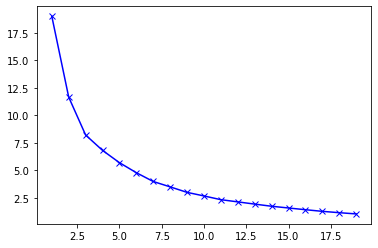

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

distortions=[]
n=range(1,20)

for k in n:
    clf = KMeans(n_clusters = k , random_state=0)
    clf.fit(cluster_grouped)
    distortions.append(clf.inertia_)

plt.plot(n,distortions,'bx-')

<b>The Optimal value of k is 7</b>

Now, we will append the columns consisting of cluster labels to the Dataframe and visualize it on the map .

In [47]:
n=7
clf = KMeans(n_clusters = n)
clf.fit(cluster_grouped)
clf.labels_

array([0, 0, 0, 0, 4, 0, 4, 0, 1, 0, 3, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 0,
       0, 6, 2, 3, 0, 3, 0, 0, 0, 6, 4, 4, 4, 1, 1, 0, 3, 3, 0, 3, 3, 0,
       0, 4, 4, 0, 2, 0, 0, 0, 3, 4, 4, 1, 4, 0, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 3, 3, 1, 0, 0, 4, 0, 0, 0, 3, 0, 1, 2, 4, 3, 6, 0, 4,
       0, 0, 1, 0, 0, 0, 0, 3, 3, 4, 1, 0, 4, 2, 0, 0, 0, 4, 3, 3, 6, 1,
       3, 3, 0, 0, 1, 3, 0, 4, 0, 0, 4, 1, 0, 0, 0, 4, 0, 6, 0, 6, 1, 1,
       4, 3, 0, 0, 0, 1, 3, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 3, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 3, 1, 0, 4, 0, 3, 0,
       0, 0, 4, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], dtype=int32)

In [48]:
mumbai_merged = mumbai_rest.groupby('Neighborhood').mean().reset_index()
mumbai_merged.insert(0,'Cluster Labels',clf.labels_)
mumbai_merged.head()

Cluster Labels      Neighborhood  Neighborhood Latitude  \
0               0  A I staff colony              19.075990   
1               0  Aareymilk Colony              19.075990   
2               0          Agripada              19.075990   
3               0           Airport              19.075990   
4               4          Ambewadi              18.962367   

   Neighborhood Longitude  Venue Latitude  Venue Longitude  
0               72.877393       19.076853        72.878705  
1               72.877393       19.076853        72.878705  
2               72.877393       19.076853        72.878705  
3               72.877393       19.076853        72.878705  
4               72.827122       18.963084        72.827756

We have cluster neigborhoods according to cuisines and appended cluster labels to main dataframe.Now,let's visualize it on map and see which neighborhood are simmilar in terms of cuisines.Neighborhoods having same cluster color suggests that they are similar in terms of cuisines of restaurants they have.  

In [49]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[lat, lng], zoom_start=11)
folium.TileLayer('cartodbpositron').add_to(map_clusters)

x = np.arange(n)
ys = [i + x + (i*x)**2 for i in range(n)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_merged['Venue Latitude'], mumbai_merged['Venue Longitude'], mumbai_merged['Neighborhood'], mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

## Analysis  <a name='analysis'></a>

Let's separate out the restaurants category from the venues dataframe and find the most and least common retaurant in every neighborhood.<br>
Based on that dataframe we will do the analysis.

In [50]:
rest = mumbai_venues[mumbai_venues['Venue Category'].str.contains('Restaurant')].reset_index()
rest.head()

index      Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      1  A I staff colony               19.07599               72.877393   
1      3  A I staff colony               19.07599               72.877393   
2      4  A I staff colony               19.07599               72.877393   
3      8  A I staff colony               19.07599               72.877393   
4     11  A I staff colony               19.07599               72.877393   

                       Venue  Venue Latitude  Venue Longitude  \
0                Delhi Zaika       19.077054        72.878260   
1         Nawab Sheek Corner       19.076933        72.878260   
2          Sahara Restaurant       19.079532        72.880152   
3            Mughal Flavours       19.079761        72.880302   
4  Grapevine Gourmet Cuisine       19.070983        72.876549   

              Venue Category  
0          Indian Restaurant  
1  Middle Eastern Restaurant  
2         Mughlai Restaurant  
3          Indian Restaurant  
4          Indian Restaurant

In [51]:
rest.shape

(1357, 8)

There are total <b>1357</b> restaurants.Let's group them according to Venue category or cuisines and plot a graph for more better understanding.<br>Let's see distrbution of number of restaurants in the city.

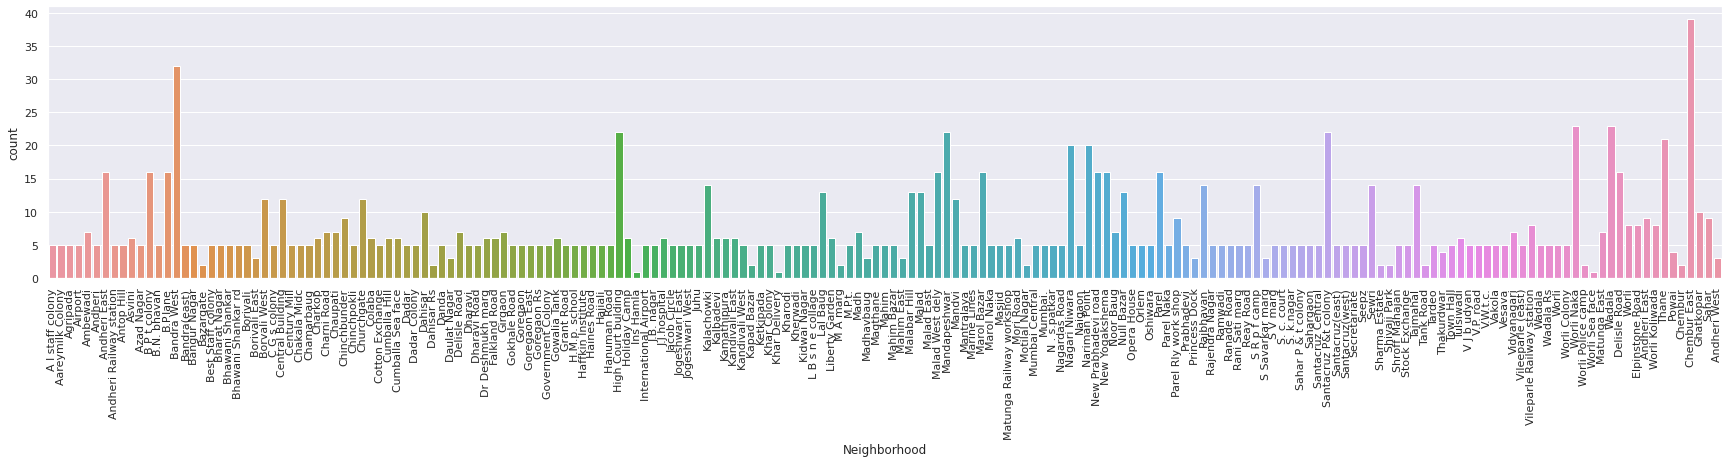

In [53]:
plt = sns.countplot(x='Neighborhood',data=rest)
sns.set(rc={'figure.figsize':(30,5)})
plt.set_xticklabels(labels=df_mum['Neighborhood'],rotation=90)
plt

In [54]:
rest_count = rest.groupby('Venue Category').count().reset_index()
rest_count.head(10)

Venue Category  index  Neighborhood  Neighborhood Latitude  \
0     American Restaurant     10            10                     10   
1        Asian Restaurant     32            32                     32   
2      Bengali Restaurant      1             1                      1   
3      Chinese Restaurant     75            75                     75   
4     Dumpling Restaurant      1             1                      1   
5      Falafel Restaurant      1             1                      1   
6    Fast Food Restaurant     73            73                     73   
7       French Restaurant      4             4                      4   
8       German Restaurant      1             1                      1   
9  Gluten-free Restaurant      1             1                      1   

   Neighborhood Longitude  Venue  Venue Latitude  Venue Longitude  
0                      10     10              10               10  
1                      32     32              32               32  
2                       1      1               1                1  
3                      75     75              75               75  
4                       1      1               1                1  
5                       1      1               1                1  
6                      73     73              73               73  
7                       4      4               4                4  
8                       1      1               1                1  
9                       1      1               1                1

Let's create a graph for <b>distribution of restaurants</b> in whole city.This will give proper statistics about cuisines of restaurants situated in the city.

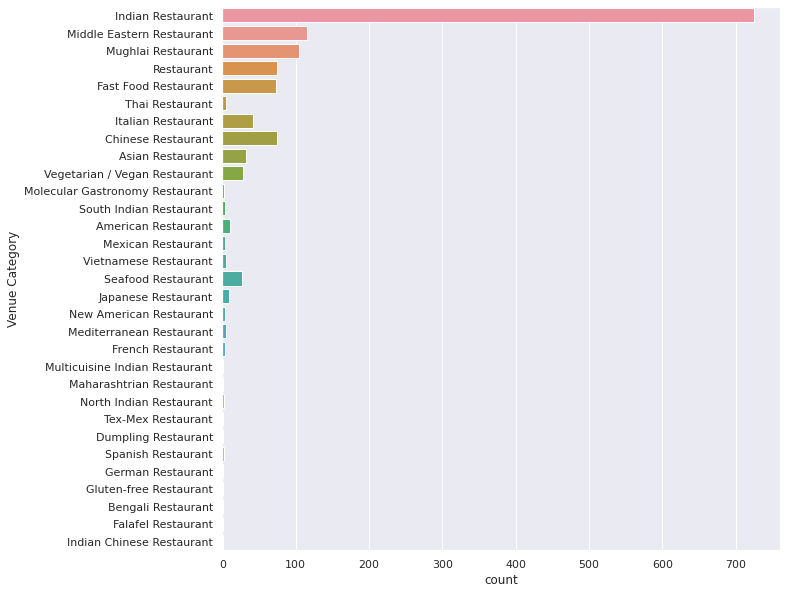

In [56]:
sns.countplot(y= 'Venue Category',data=rest)
sns.set(rc={'figure.figsize':(10,10)})

Now,let's visualize the distribution of restaurants in each area with the help of <b>Heat Map</b>.This shows which cuisines are present in every area or neighborhood.

In [57]:
rest_dum = pd.get_dummies(rest[['Neighborhood']], prefix="", prefix_sep="")
rest_dum['Neighborhood'] = rest['Neighborhood']

rest_stat = rest_onehot.groupby('Neighborhood').mean()

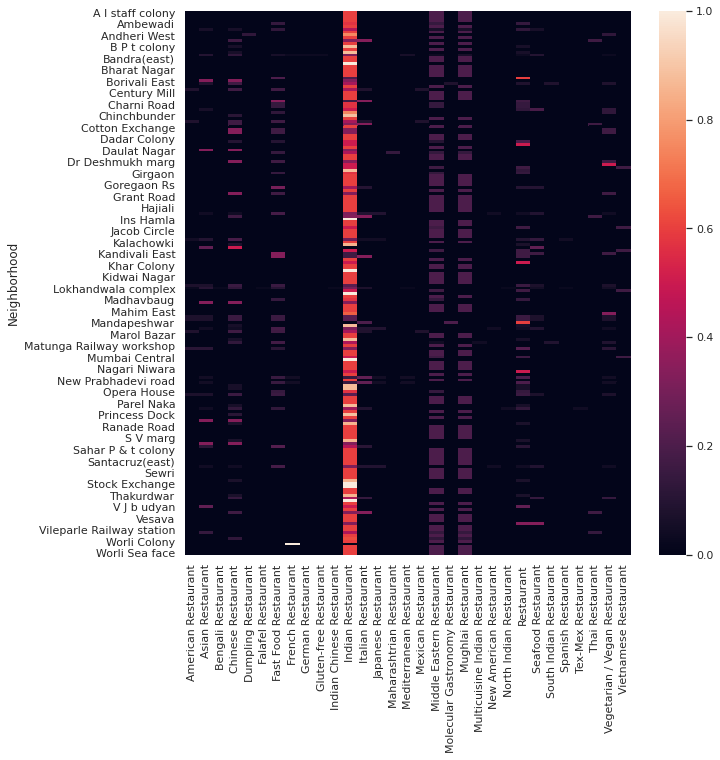

In [58]:
sns.heatmap(rest_stat)
sns.set(rc={'figure.figsize':(30,20)})

Now , comes the <b>final part</b> of project i.e getting the least and most common restaurants in each area and also visualizing the<b> crowd density </b>on the map. This will give a clear idea on appropriate location and also the cuisine for an individual for  his/her restaurant. <br>
Below is function for filtering out top common restaurant list. After filtering ,  we will create another dataframe which states top 7 common restaurants in each area. 

In [59]:
def get_top_venues(row,num):
    row_cat = row.iloc[1:]
    row_sorted = row_cat.sort_values(ascending=False)
    
    return row_sorted.index.values[0:num]

In [60]:
num = 7

a = ['st','nd','rd']
columns=['Neighborhood']
for i in np.arange(num):
    try:
        columns.append('{}{} common restaurant'.format(i+1,a[i]))
    except:
        columns.append('{}th common restaurant'.format(i+1))
    
rest_common = pd.DataFrame(columns=columns)
rest_common['Neighborhood'] = rest_grouped['Neighborhood']
    
for i in np.arange(rest_grouped.shape[0]):
    rest_common.iloc[i,1:] = get_top_venues(rest_grouped.iloc[i,:],num)
    
rest_common.head()

Neighborhood 1st common restaurant 2nd common restaurant  \
0  A I staff colony     Indian Restaurant    Mughlai Restaurant   
1  Aareymilk Colony     Indian Restaurant    Mughlai Restaurant   
2          Agripada     Indian Restaurant    Mughlai Restaurant   
3           Airport     Indian Restaurant    Mughlai Restaurant   
4          Ambewadi     Indian Restaurant            Restaurant   

       3rd common restaurant      4th common restaurant  \
0  Middle Eastern Restaurant      Vietnamese Restaurant   
1  Middle Eastern Restaurant      Vietnamese Restaurant   
2  Middle Eastern Restaurant      Vietnamese Restaurant   
3  Middle Eastern Restaurant      Vietnamese Restaurant   
4       Fast Food Restaurant  Middle Eastern Restaurant   

   5th common restaurant 6th common restaurant 7th common restaurant  
0    Japanese Restaurant      Asian Restaurant    Bengali Restaurant  
1    Japanese Restaurant      Asian Restaurant    Bengali Restaurant  
2    Japanese Restaurant      Asian Restaurant    Bengali Restaurant  
3    Japanese Restaurant      Asian Restaurant    Bengali Restaurant  
4  Vietnamese Restaurant   Japanese Restaurant      Asian Restaurant

Above dataframe shows most and least common restaurants in a particular neighborhood. 

In [61]:
mumbai_merged.set_index('Neighborhood',inplace=True)
rest_common.set_index('Neighborhood',inplace=True)

In [62]:
rest_final = rest_common.merge(mumbai_merged,left_index=True,right_index=True,how='inner')
rest_final.reset_index(inplace=True)
rest_final.head()

Neighborhood 1st common restaurant 2nd common restaurant  \
0  A I staff colony     Indian Restaurant    Mughlai Restaurant   
1  Aareymilk Colony     Indian Restaurant    Mughlai Restaurant   
2          Agripada     Indian Restaurant    Mughlai Restaurant   
3           Airport     Indian Restaurant    Mughlai Restaurant   
4          Ambewadi     Indian Restaurant            Restaurant   

       3rd common restaurant      4th common restaurant  \
0  Middle Eastern Restaurant      Vietnamese Restaurant   
1  Middle Eastern Restaurant      Vietnamese Restaurant   
2  Middle Eastern Restaurant      Vietnamese Restaurant   
3  Middle Eastern Restaurant      Vietnamese Restaurant   
4       Fast Food Restaurant  Middle Eastern Restaurant   

   5th common restaurant 6th common restaurant 7th common restaurant  \
0    Japanese Restaurant      Asian Restaurant    Bengali Restaurant   
1    Japanese Restaurant      Asian Restaurant    Bengali Restaurant   
2    Japanese Restaurant      Asian Restaurant    Bengali Restaurant   
3    Japanese Restaurant      Asian Restaurant    Bengali Restaurant   
4  Vietnamese Restaurant   Japanese Restaurant      Asian Restaurant   

   Cluster Labels  Neighborhood Latitude  Neighborhood Longitude  \
0               0              19.075990               72.877393   
1               0              19.075990               72.877393   
2               0              19.075990               72.877393   
3               0              19.075990               72.877393   
4               4              18.962367               72.827122   

   Venue Latitude  Venue Longitude  
0       19.076853        72.878705  
1       19.076853        72.878705  
2       19.076853        72.878705  
3       19.076853        72.878705  
4       18.963084        72.827756

<br>
Now, we filter out venues from venues dataframe which consist of crowd density which is plays a very important role for a<b> profitable business or restaurant</b>.This crowded areas consist of<b> parks,malls,cinemas,bus station,markets , tourist attraction </b>etc. And this also consists of other restaurant whic are already present in that area which attract crowds.<br>
Another factor for profitable restaurant is<b> vehicle parking facilities </b>present near it.This venues list consists of <b>malls,cinemas,park,offices,stadium,Supermarkets </b> etc.So,we will also filter out it too.<br>
After, filtering all types of venues we will visualize it on the map to get a clear look.
<br>

In [63]:
crowd = mumbai_venues[mumbai_venues['Venue Category'].str.contains('Supermarket|Mall|Theatre|Multiplex|Park|Office|Outdoors|Store|Museum|Art|Gallary|Garden|Market|Station|Concert|Scenic|Sports|Play|Stadium|Beach|Court|Shop|Arcade|Building|Restaurant|Hotel|Food|Diner|Cinemas|Bar|Pub|Diner')]
park = mumbai_venues[mumbai_venues['Venue Category'].str.contains('Supermarket|Mall|Theatre|Park|Garden|Multiplex|Office|Stadium|Cinema')]
crowd.shape

(2503, 7)

There are total <b> 2503 crowded venues in the city
Let's visualise what we have filtered out above.We will represent crowd with the help of heatmap and parking venues as red circle spots. 

In [64]:
from folium import plugins
from folium.plugins import HeatMap

lat=19.0760
lng=72.8777

map_mumbai = folium.Map(location= [lat,lng],zoom_start = 11)
folium.TileLayer('Mapbox Bright').add_to(map_clusters)

for lat, lon, label in zip(park['Venue Latitude'], park['Venue Longitude'],  park['Venue']):
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=0.5).add_to(map_mumbai)


HeatMap(data = crowd[['Venue Latitude', 'Venue Longitude']],
            parse_html=True,radius=20,min_opacity=0.5).add_to(map_mumbai)

map_mumbai

## Final Output <a name='output'></a> 

Finally, we have got everything that was required and now let's combine crowd density heat map, vehicle parking Venues and an<b> info marker</b> at every neighborhood.This info marker on clicking on will popup a label which consists of name of neighborhood , <b>most common and least common cuisines</b> at that area.<br>
This will give a clear idea for a profitable place for opening a new restaurant.

In [65]:
from folium import plugins
from folium.plugins import HeatMap

lat=19.0760
lng=72.8777

map_mumbai = folium.Map(location= [lat,lng],zoom_start = 11)
folium.TileLayer('Mapbox Bright').add_to(map_mumbai)


for name,lat,lng,i,j,k,l,m,n in zip(rest_final['Neighborhood'],rest_final['Neighborhood Latitude'],rest_final['Neighborhood Longitude'],rest_final['1st common restaurant'],
                                    rest_final['2nd common restaurant'],rest_final['3rd common restaurant'],rest_final['4th common restaurant'],rest_final['5th common restaurant'],
                                    rest_final['7th common restaurant']):
    
    label = ("@"+str(name).upper()+' >>>>> '
             + 'MOST COMMON = '+str(i)+' ; '+str(j) + ' ; ' + str(k)+ '  ||| LEAST COMMON = ' + str(l) + ' ; ' + str(m)+' ; '+str(n))
    folium.Marker(
        [lat, lng],
        popup=folium.Popup(label,max_width=300,min_width=300,parse_html=True),
        icon=folium.Icon(color='gray')).add_to(map_mumbai)
    
HeatMap(data = crowd[['Venue Latitude', 'Venue Longitude']],
            parse_html=True,radius=20,min_opacity=0.5).add_to(map_mumbai)

for lat, lon, label in zip(park['Venue Latitude'], park['Venue Longitude'],  park['Venue Category']):
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=0.5).add_to(map_mumbai)
    
    
map_mumbai

## Result <a name='result'></a>

Our analysis shows that Mumbai is heavily crowded city and also there are various restaurants in it.Clustering as according to type of restaurant will tell which neighborhood are similar in terms of cuisines.This city has different cuisine restaurants present various parts of area.But various
different cuisines like Sushi,Japanese,American,South American,Spanish,Braizilian are present but very few.This point should be taken into consideration for selecting cuisine for new restaurant.Cuisine like Indian,Chinese,Fast Food,Seafood are most popular in Mumbai. Asian, ,French,Italian,Mugalai are quite popular cuisines.If Stateholder are not ready to take risk can go for these types of cuisines.But these are common so , there are various other restaurants which will give a competetion.<br>

Crowd density as seen on heatmap tells Mumbai is quite crowded city, which eventually helps in customers. Vehicle Parking facilities are present at some parts of Mumbai.These spots or areas will also help in choosing a place.The information of every neighborhood is seen on the popup when clicking on markers.Some area have Chinese cuisine as popular and some has Italian as most common.This is information varies from place to place.If you have selected a cuisine and want a place to set up, this inforamtion will be a great help.<br><br>
Considering every aspects and analysis , one can select perfect place to set up his/her restaurant.

## Conclusion <a name='conclusion'></a>

Purpose of this project was to select a perfect cuisine and identify  a optimal place to set a restaurant.By using geopy geodecoding we got coordinates of neighborhoods.Then, Foursquare api gave venues in every neighborhood.With this data we cluster them,analayze them and visualise it on the graphs and map.The map and graphs gave a clear vision on our analysis.We then on the basis various aspects like crowd density,vehicle parkings and popularity of cuisine did the further mapping.<br>

Final decesion on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc